In [5]:
# from google.colab import drive
# drive.mount("/content/gdrive")

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 6]

# Statistical TS Modeling

Working on some graphics for the proposal presentation using AQI data from Florida (2017-2018). Univariate time series for simplicity and exposition.

See Kaggle .ipynb here: https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python
See Towards Data Science here: https://medium.com/@stallonejacob/time-series-forecast-a-basic-introduction-using-python-414fcb963000


In [7]:
# dat = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/CSE 5819/Data/aqi_sample_data_wakulla_florida_bdate_20170101_edate_20191231_wind_speed_dir.csv")
dat = pd.read_csv("Data/aqi_sample_data_wakulla_miami-dade_hillsborough_florida_bdate_20150101_edate_20191231_wind_speed_dir.csv")
dat.head(10)
dat.head(5)

,datetime_gmt,Wind_Speed_wakulla,Barometric_Pressure_wakulla,cos_Wind_Dir_wakulla,sin_Wind_Dir_wakulla,Wind_Speed_hillsborough,cos_Wind_Dir_hillsborough,sin_Wind_Dir_hillsborough,Wind_Speed_miami,cos_Wind_Dir_miami,sin_Wind_Dir_miami
0,8/12/2015 5:00,0.3,1008.0,0.987688,-0.156434,NaN,NaN,NaN,1.6,0.956305,0.292372
1,8/12/2015 6:00,0.1,1008.0,-0.927184,-0.374607,NaN,NaN,NaN,1.4,0.951057,0.309017
2,8/12/2015 7:00,0.1,1008.0,0.788011,-0.615661,NaN,NaN,NaN,1.4,0.615661,0.788011
3,8/12/2015 8:00,0.3,1008.0,-0.406737,-0.913545,NaN,NaN,NaN,1.7,0.891007,0.453991
4,8/12/2015 9:00,0.3,NaN,-0.484810,-0.874620,NaN,NaN,NaN,2.1,0.798636,0.601815


In [8]:
from pandas._config import dates

def make_datetime_index(dat):
    dat_prep = dat.copy()
    dat_prep["datetime_gmt"] = pd.to_datetime(dat_prep["datetime_gmt"])
    dat_prep = dat_prep.set_index("datetime_gmt")
    return dat_prep
    
dat = make_datetime_index(dat)
dat.head(5)

<AxesSubplot:xlabel='datetime_gmt'>

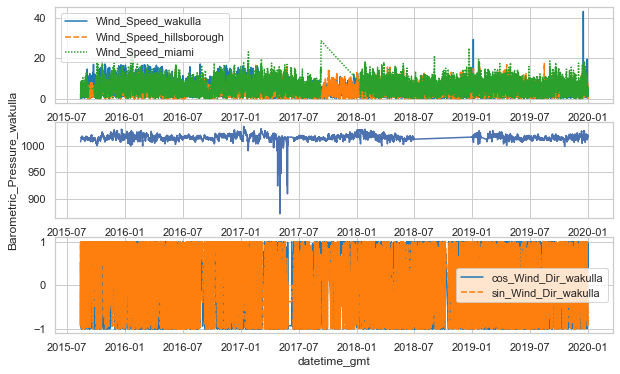

In [ ]:
sns.set_theme(style = "whitegrid")

wind_speed_cols = ["Wind_Speed_wakulla", "Wind_Speed_hillsborough", "Wind_Speed_miami"]
fig, axs = plt.subplots(nrows = 3)
sns.lineplot(data = dat[wind_speed_cols], palette = "tab10", ax = axs[0])
sns.lineplot(data = dat[ "Barometric_Pressure_wakulla"], palette = "tab10", ax = axs[1])
sns.lineplot(data = dat[["cos_Wind_Dir_wakulla", "sin_Wind_Dir_wakulla"]], palette = "tab10", ax = axs[2])

<AxesSubplot:>

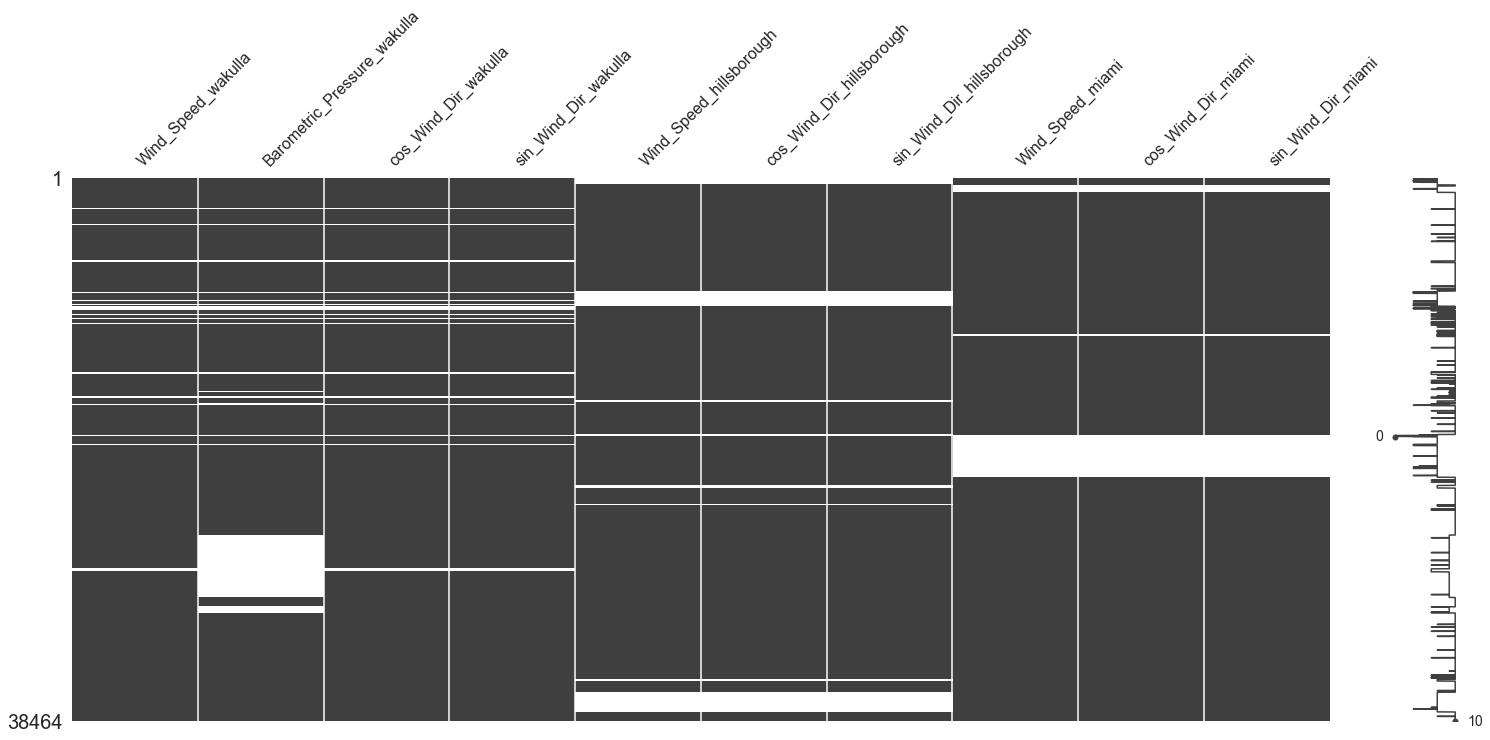

In [ ]:
import missingno as msno

msno.matrix(dat)

In [ ]:
miss_mat = dat.isna().replace([True, False], [1, 0])
miss_mat.sum(axis = 0)

Wind_Speed_wakulla             1753
Barometric_Pressure_wakulla    6403
cos_Wind_Dir_wakulla           1753
sin_Wind_Dir_wakulla           1753
Wind_Speed_hillsborough        3610
cos_Wind_Dir_hillsborough      3610
sin_Wind_Dir_hillsborough      3610
Wind_Speed_miami               3726
cos_Wind_Dir_miami             3726
sin_Wind_Dir_miami             3726
dtype: int64

<AxesSubplot:>

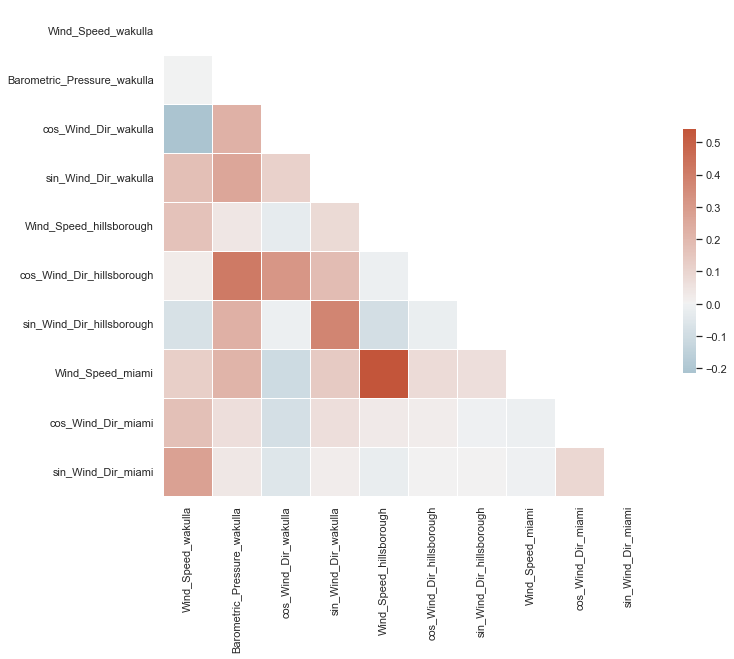

In [ ]:
corr = dat.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize = (11,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center = 0, square=True, 
            linewidths=.5, cbar_kws={"shrink": .5})

Train and Test split. I'll use 70% and 30%. I'll use the imputation methods from Che et al (2018). Namely filling all of the missing values with the mean from the training data set in the train and test data sets.

In [ ]:
n_train = int(len(dat) * 0.7)

train_means = dat.iloc[1:n_train, :].mean()
train_means

Wind_Speed_wakulla                4.351169
Barometric_Pressure_wakulla    1016.409353
cos_Wind_Dir_wakulla              0.018055
sin_Wind_Dir_wakulla              0.068549
Wind_Speed_hillsborough           3.931373
cos_Wind_Dir_hillsborough         0.114337
sin_Wind_Dir_hillsborough         0.231935
Wind_Speed_miami                  5.636167
cos_Wind_Dir_miami                0.096620
sin_Wind_Dir_miami                0.191819
dtype: float64

In [ ]:
dat.fillna(value = train_means, inplace = True)
dat = dat.dropna()
print(dat.shape)
dat.head(5)

(38464, 10)


,Wind_Speed_wakulla,Barometric_Pressure_wakulla,cos_Wind_Dir_wakulla,sin_Wind_Dir_wakulla,Wind_Speed_hillsborough,cos_Wind_Dir_hillsborough,sin_Wind_Dir_hillsborough,Wind_Speed_miami,cos_Wind_Dir_miami,sin_Wind_Dir_miami
datetime_gmt,,,,,,,,,,
2015-08-12 05:00:00,0.3,1008.000000,0.987688,-0.156434,3.931373,0.114337,0.231935,1.6,0.956305,0.292372
2015-08-12 06:00:00,0.1,1008.000000,-0.927184,-0.374607,3.931373,0.114337,0.231935,1.4,0.951057,0.309017
2015-08-12 07:00:00,0.1,1008.000000,0.788011,-0.615661,3.931373,0.114337,0.231935,1.4,0.615661,0.788011
2015-08-12 08:00:00,0.3,1008.000000,-0.406737,-0.913545,3.931373,0.114337,0.231935,1.7,0.891007,0.453991
2015-08-12 09:00:00,0.3,1016.409353,-0.484810,-0.874620,3.931373,0.114337,0.231935,2.1,0.798636,0.601815


In [ ]:
train_dat = dat.iloc[:n_train]
test_dat = dat.iloc[n_train:]

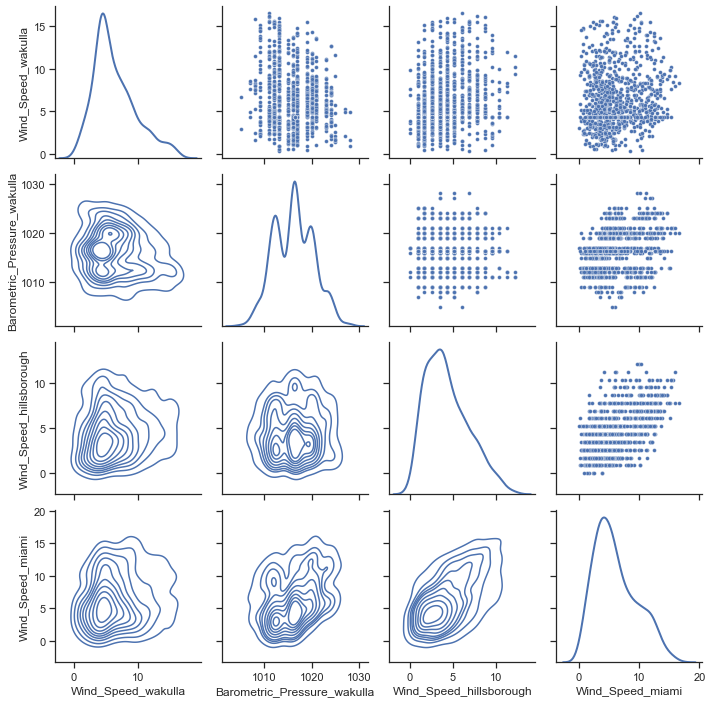

In [ ]:
sns.set_theme(style = "ticks")

g = sns.PairGrid(train_dat.iloc[5000:6000,[0,1,4,7]], diag_sharey=False)
g.map_upper(sns.scatterplot, s = 15)
g.map_diag(sns.kdeplot, lw = 2)
g.map_lower(sns.kdeplot)

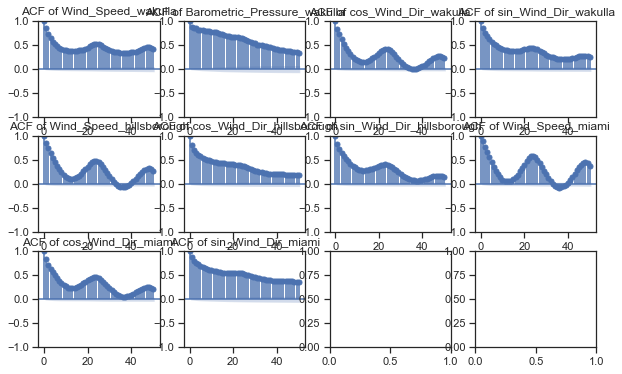

In [ ]:
import statsmodels.api as sm
fig, axs = plt.subplots(nrows = 3, ncols = 4)

for i in [0,1,2]:
    for j in [0,1,2,3]:
        col_ind = j + 4 * i
        if col_ind >= 10:
            break
        sm.graphics.tsa.plot_acf(train_dat.iloc[:, col_ind].values.squeeze(), lags = 50, ax = axs[i,j], title = "ACF of " + train_dat.columns[col_ind])
    if col_ind >= 10:
        break

In [ ]:
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.seasonal import DecomposeResult

stl = STL(dat['Wind_Speed_wakulla'], period = 24, seasonal = 365)
res = stl.fit()
res.seasonal.head()



datetime_gmt
2015-08-12 05:00:00    0.205055
2015-08-12 06:00:00    0.575707
2015-08-12 07:00:00    0.853744
2015-08-12 08:00:00    0.808642
2015-08-12 09:00:00    0.966853
Name: season, dtype: float64

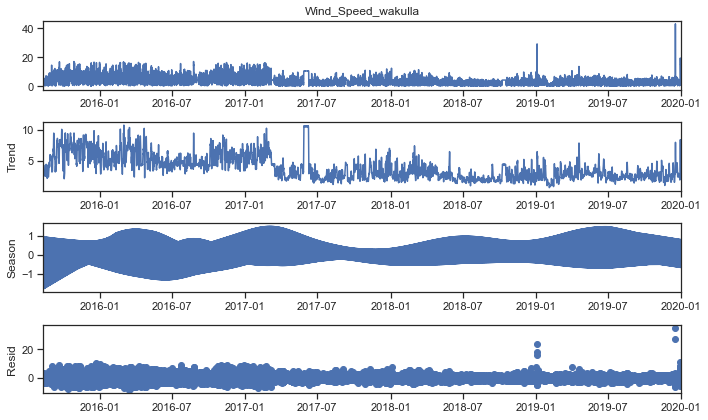

In [ ]:
fig = res.plot()

In [ ]:
# def create_dataset(dat, lags = 1):
#   """ VARMAX takes a 2D array so the data must be re-shaped to:
#   - [T, P]
#   - T = number of time steps
#   - P = number of predictors
#   """
#   Inputs, Outputs = [], []
#   X = dat.to_numpy()

#   for i in range(len(X) - lags):
#     v = X[i:i+lags]
#     Inputs.append(X[i])
#     Outputs.append(X[i + lags])

#   return np.array(Inputs), np.array(Outputs)

# lags = 1

# X_train, y_train = create_dataset(train_dat, lags)
# X_test, y_test = create_dataset(test_dat, lags)

# print('X_train.shape: ', X_train.shape)
# print('y_train.shape: ', y_train.shape)
# print('X_test.shape: ', X_test.shape) 
# print('y_test.shape: ', y_test.shape)

X_train.shape:  (26923, 10)
y_train.shape:  (26923, 10)
X_test.shape:  (11539, 10)
y_test.shape:  (11539, 10)


In [ ]:
import statsmodels.api as sm
mod = sm.tsa.VAR(dat.iloc[0:n_train,:])

mod.select_order(100)
res2 = mod.fit(maxlags = 100, ic = 'aic', trend = 'ct', verbose = True)

c:\Users\stocb\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 52, BIC -> 6, FPE -> 52, HQIC ->  26>
Using 52 based on aic criterion


In [ ]:
res2.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 12, Dec, 2022
Time:                     16:28:44
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                   -8.71770
Nobs:                     26872.0    HQIC:                  -9.79664
Log likelihood:          -237547.    FPE:                3.32882e-05
AIC:                     -10.3104    Det(Omega_mle):     2.74622e-05
--------------------------------------------------------------------
Results for equation Wind_Speed_wakulla
                                     coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------------
const                                  -2.985972         2.802788           -1.065           0.287
trend                                  -0.000011         0.000002         

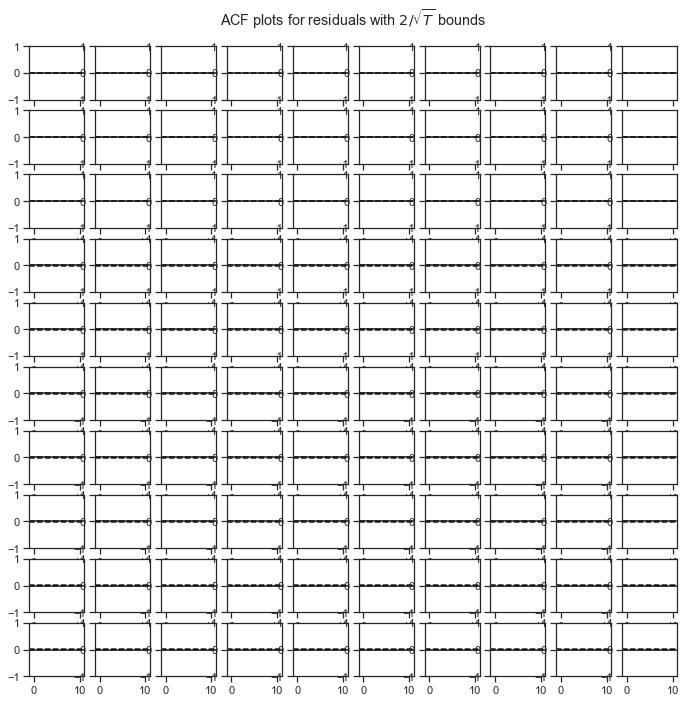

In [ ]:
_ = res2.plot_acorr()

In [ ]:
lag_order = res2.k_ar
res2.forecast(dat.values[-lag_order:], 5)

array([[ 2.34944488e+00,  1.01999511e+03,  6.70368924e-01,
        -6.04410371e-01,  1.31993865e+00,  4.01489402e-01,
        -6.95924030e-01,  4.65811516e+00, -9.16717946e-01,
        -3.38624497e-01],
       [ 2.15049698e+00,  1.01940951e+03,  5.98206746e-01,
        -5.56636132e-01,  1.68179050e+00,  3.19376842e-01,
        -5.08509291e-01,  4.09575275e+00, -6.78332586e-01,
        -2.95732299e-01],
       [ 2.21346593e+00,  1.01931688e+03,  5.66827743e-01,
        -5.07659206e-01,  1.96446916e+00,  3.66032933e-01,
        -3.51978734e-01,  3.56607542e+00, -5.93442403e-01,
        -3.24792101e-01],
       [ 2.85836697e+00,  1.01942259e+03,  5.88398431e-01,
        -4.28272132e-01,  1.69937431e+00,  4.72895914e-01,
        -3.33342645e-01,  3.34844779e+00, -5.62960769e-01,
        -3.70735287e-01],
       [ 3.07530352e+00,  1.01927922e+03,  6.20817254e-01,
        -3.89024203e-01,  1.89828461e+00,  3.91617948e-01,
        -3.09901222e-01,  3.23611641e+00, -6.89773186e-01,
        -3.

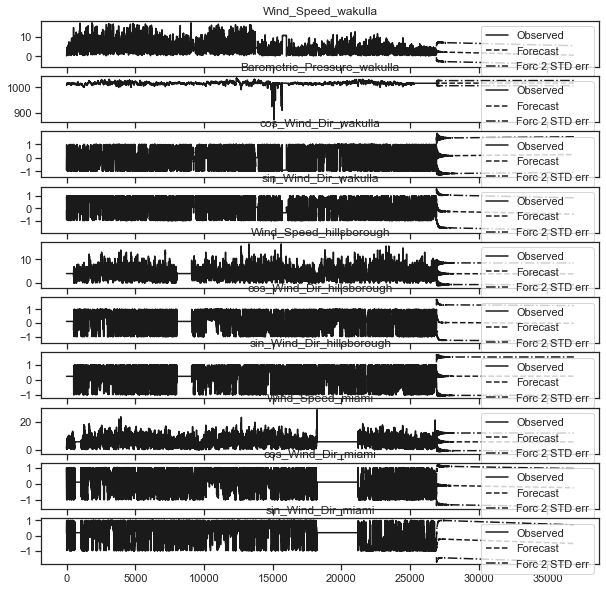

In [ ]:
_ = res2.plot_forecast(10000)

In [ ]:
range_future = 250
pred = res2.forecast(dat.values[-lag_order:], range_future)

plt.figure(figsize=(10, 6))
plt.plot(np.arange(range_future), np.array(y_test[0:range_future,0]), 
            label='Test data')
plt.plot(np.arange(range_future), 
            np.array(pred[0:range_future,0]),label='Prediction')    
plt.title('Test data vs prediction for ' + 'VARX')
plt.legend(loc='upper left')
plt.xlabel('Time (day)')
plt.ylabel('Wind Speed Wakulla')

NameError: name 'res2' is not defined

In [99]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')

evaluate_prediction(pred2[:,0], y_test[:,0], "VAR Wind Speed Wakulla")
evaluate_prediction(pred2[:,1], y_test[:,1], "VAR Pressure")
evaluate_prediction(pred2[:,2], y_test[:,2], "VAR WS Hillsborough")
evaluate_prediction(pred2[:,3], y_test[:,3], "VAR WS Miami")

VAR Wind Speed:
Mean Absolute Error: 1.7859
Root Mean Square Error: 2.3726

VAR Pressure:
Mean Absolute Error: 2.6228
Root Mean Square Error: 3.6859

VAR cos Wind Angle:
Mean Absolute Error: 3.7150
Root Mean Square Error: 3.7903

VAR sin Wind Angle:
Mean Absolute Error: 5.5307
Root Mean Square Error: 5.5766



In [109]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error

def evaluate_prediction(predictions, actual, model_name):
    mae = mean_squared_error(actual, predictions, multioutput="raw_values", squared=False)
    rmse = median_absolute_error(actual, predictions, multioutput="raw_values")

    res = pd.DataFrame({"Var": train_dat.columns,
                      model_name + "-MAE": mae, model_name + "-RMSE": rmse})
    print(res)
    return res

pred2 = res2.forecast(dat.values[-lag_order:], 11539)
evaluate_prediction(pred2, y_test, "VAR")

                           Var   VAR-MAE  VAR-RMSE
0           Wind_Speed_wakulla  2.327899  1.354977
1  Barometric_Pressure_wakulla  3.694617  1.993126
2         cos_Wind_Dir_wakulla  0.723230  0.665964
3         sin_Wind_Dir_wakulla  0.798067  0.565870
4      Wind_Speed_hillsborough  2.457206  1.447601
5    cos_Wind_Dir_hillsborough  0.652573  0.606144
6    sin_Wind_Dir_hillsborough  0.631225  0.520068
7             Wind_Speed_miami  3.238985  2.209169
8           cos_Wind_Dir_miami  0.664220  0.619673
9           sin_Wind_Dir_miami  0.648571  0.469495


,Var,VAR-MAE,VAR-RMSE
0,Wind_Speed_wakulla,2.327899,1.354977
1,Barometric_Pressure_wakulla,3.694617,1.993126
2,cos_Wind_Dir_wakulla,0.723230,0.665964
3,sin_Wind_Dir_wakulla,0.798067,0.565870
4,Wind_Speed_hillsborough,2.457206,1.447601
5,cos_Wind_Dir_hillsborough,0.652573,0.606144
6,sin_Wind_Dir_hillsborough,0.631225,0.520068
7,Wind_Speed_miami,3.238985,2.209169
8,cos_Wind_Dir_miami,0.664220,0.619673
9,sin_Wind_Dir_miami,0.648571,0.469495


In [96]:
print(y_test[:,[0,1,4,7]].shape)
pred2.shape

(11539, 4)


(11539, 4)

In [1]:
var_ws = (2.3279+2.4572+3.239) /3.0
gru_ws = (1.0263+1.1497+1.5011) / 3.0

var_ws / gru_ws

2.182181610508281

In [2]:
3.6946 / 0.9072

4.072530864197531

In [3]:
var_cs = (0.7232+.7981+.6526+.6312+.6642+.6486) / 6.0
gru_cs = (0.3606+.3198+.3435+.3470+.3733+.3741) / 6.0

var_cs / gru_cs

1.943964499834774